# Data Exploration


## Get the data into the database first


In [ ]:
import os
from project.Pipeline import Pipeline
from project.database.DatabaseHandler import DatabaseHandler

if not 'project' in os.getcwd():
    os.chdir(os.path.join('2023-amse-template', 'project'))

# creates sqlite3 file, initializes db scheme
DatabaseHandler().initialize_database()

# instantiate pipeline
pipeline = Pipeline()

# scrapes accident data from opengeodata.nrw
data = pipeline.scrape_accident_data()

# preprocess data
data = pipeline.preprocess(data)

# feeds collected data into db, queries OSM to download and assign road type
pipeline.data_to_db(data)


##  Use Explorer class to explore the scraped data

In [3]:
import os
os.chdir('project')

from Explorer import Explorer
explorer = Explorer()

Map of Accidents

/Users/leonardfischer/Uni/sem_2/de/2023-amse-template/project/Explorer.py:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


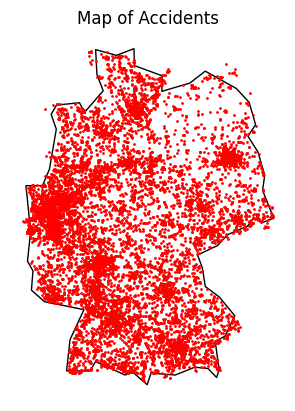

In [9]:
explorer.plot_accident_location(n_accidents=15 * 1000)

Heatmap of Accident Participants

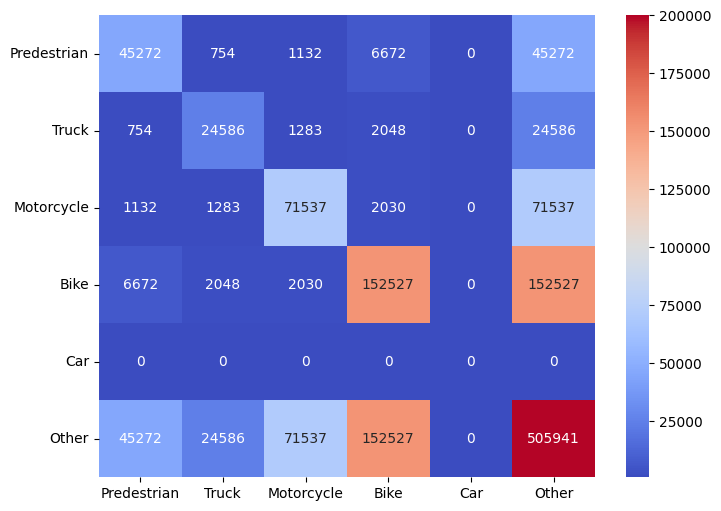

In [6]:
explorer.plot_accidents_by_participants()

Distribution of accidents among road types

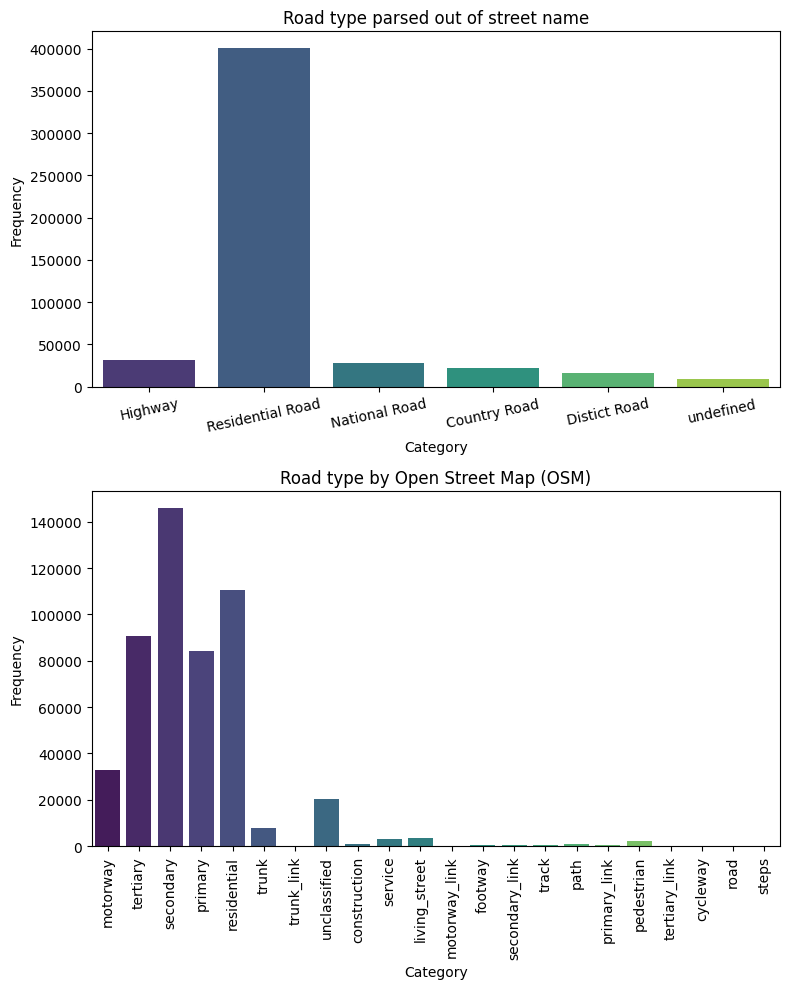

In [7]:
explorer.plot_accidents_by_street_type()

Accident frequency of week days where 1 corresponds to sunday and 7 corresponds to saturday.

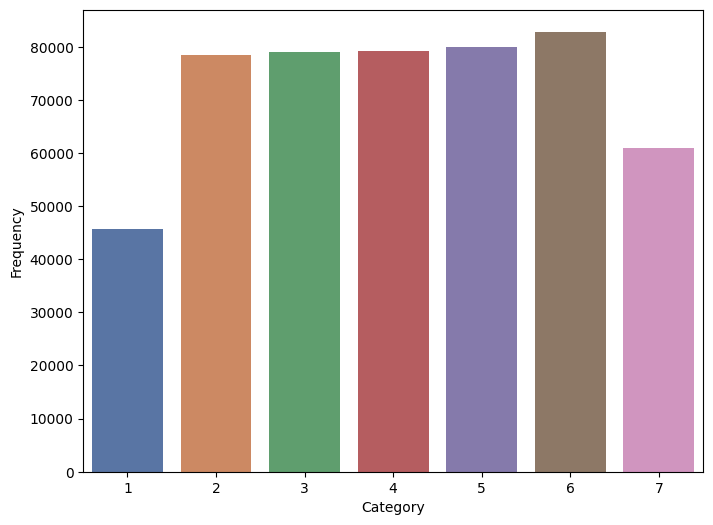

In [8]:
explorer.plot_accidents_by_weekday()
